# 📊 CDFs และ Percentiles - เข้าใจ Normal Distribution

**ผู้เขียน**: Hamdee Naseng  
**วันที่**: 3 พฤศจิกายน 2025  
**วัตถุประสงค์**: สอนการใช้ CDF, PDF, และ Percentiles กับ Normal Distribution

---

## 🎯 โค้ดนี้สอนอะไร?

โค้ดนี้สอน **สถิติพื้นฐานที่สำคัญมาก** สำหรับ Bayesian ML:

### 📚 เนื้อหาที่จะเรียนรู้:
1. 🎲 **สุ่มข้อมูล** จาก Normal Distribution
2. 📈 **คำนวณ Mean, Variance, SD** (Maximum Likelihood)
3. 🔧 **Unbiased Estimators** (ddof=1)
4. 📊 **Percentile** - อยู่ตำแหน่งไหนในกลุ่ม
5. 📉 **CDF** - ความน่าจะเป็นสะสม
6. 🎯 **PPF** - หาค่าจาก percentile

### 🌍 ตัวอย่างจริง:
**โจทย์**: ส่วนสูงของคนไทยเฉลี่ย 170 cm, SD = 7 cm
- คุณสูง 180 cm → อยู่ percentile ไหน?
- อยากอยู่ top 5% → ต้องสูงเท่าไหร่?
- มีคนสูงกว่า 180 cm กี่เปอร์เซ็นต์?

---

## 📦 Step 1: Import และตั้งค่า

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ตั้งค่า font สำหรับภาษาไทย
import matplotlib.font_manager as fm

font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

print("✅ Import สำเร็จ!")
print(f"✅ ตั้งค่า Font ภาษาไทยเป็น '{font_name}' เรียบร้อย")

✅ Import สำเร็จ!
✅ ตั้งค่า Font ภาษาไทยเป็น 'Prompt' เรียบร้อย


## 📊 Step 2: กำหนดพารามิเตอร์ของ Population

เรากำหนดว่าส่วนสูงของประชากร (population) มีการกระจายแบบ Normal:
- **μ (mu)** = 170 cm (ค่าเฉลี่ยจริง)
- **σ (sigma)** = 7 cm (standard deviation จริง)

**สำคัญ**: นี่คือ **ค่าจริงของ population** ที่เราไม่รู้ในชีวิตจริง  
แต่ในการสอนเราจะสมมติว่ารู้ เพื่อเปรียบเทียบกับค่าที่ประมาณได้

In [3]:
# พารามิเตอร์จริงของ population
mu = 170      # ค่าเฉลี่ยจริง (cm)
sd = 7        # standard deviation จริง (cm)

print("📊 พารามิเตอร์ของ Population:")
print(f"  μ (mean) = {mu} cm")
print(f"  σ (std)  = {sd} cm")
print(f"\n💡 นี่คือค่าจริง ในชีวิตจริงเราไม่รู้ ต้องประมาณจากตัวอย่าง!")

📊 พารามิเตอร์ของ Population:
  μ (mean) = 170 cm
  σ (std)  = 7 cm

💡 นี่คือค่าจริง ในชีวิตจริงเราไม่รู้ ต้องประมาณจากตัวอย่าง!


## 🎲 Step 3: สุ่มตัวอย่าง (Sampling)

ใช้ `norm.rvs()` (random variates) สุ่มข้อมูล 100 ตัวอย่าง

**Parameters**:
- `loc` = mean (ตำแหน่งของการกระจาย)
- `scale` = standard deviation (ความกว้างของการกระจาย)
- `size` = จำนวนตัวอย่าง

In [4]:
# สุ่มตัวอย่าง 100 คน
x = norm.rvs(loc=mu, scale=sd, size=100)

print("🎲 สุ่มตัวอย่าง 100 คน")
print(f"\nตัวอย่างแรก 10 คน (cm):")
print(x[:10])
print(f"\n📊 สถิติตัวอย่าง:")
print(f"  ค่าต่ำสุด:  {x.min():.2f} cm")
print(f"  ค่าสูงสุด:  {x.max():.2f} cm")
print(f"  จำนวน:     {len(x)} คน")

🎲 สุ่มตัวอย่าง 100 คน

ตัวอย่างแรก 10 คน (cm):
[164.67043763 185.57677223 168.9404518  170.83928727 171.33791918
 155.84564409 180.36145217 161.16019351 153.0655242  173.337257  ]

📊 สถิติตัวอย่าง:
  ค่าต่ำสุด:  152.23 cm
  ค่าสูงสุด:  190.04 cm
  จำนวน:     100 คน


## 📈 Step 4: Maximum Likelihood Estimators

จากตัวอย่างที่สุ่มมา เราประมาณค่า mean, variance, และ std

### 🔢 สูตร:
- **Mean**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$
- **Variance (MLE)**: $s^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$
- **Std (MLE)**: $s = \sqrt{s^2}$

**MLE (Maximum Likelihood Estimation)** = วิธีประมาณที่ทำให้ likelihood สูงสุด

In [5]:
# Maximum Likelihood Estimators (หารด้วย n)
sample_mean = x.mean()
sample_var = x.var()          # default: ddof=0 (หารด้วย n)
sample_std = x.std()           # default: ddof=0

print("📈 Maximum Likelihood Estimators (MLE):")
print(f"  Mean:     {sample_mean:.2f} cm (จริง: {mu} cm)")
print(f"  Variance: {sample_var:.2f} (จริง: {sd**2:.2f})")
print(f"  Std:      {sample_std:.2f} cm (จริง: {sd} cm)")
print(f"\n💡 MLE หารด้วย n → ลำเอียง (biased) เล็กน้อย!")

📈 Maximum Likelihood Estimators (MLE):
  Mean:     169.77 cm (จริง: 170 cm)
  Variance: 45.28 (จริง: 49.00)
  Std:      6.73 cm (จริง: 7 cm)

💡 MLE หารด้วย n → ลำเอียง (biased) เล็กน้อย!


## 🔧 Step 5: Unbiased Estimators

**ปัญหาของ MLE**: Variance และ Std ที่คำนวณได้มักต่ำกว่าค่าจริงเล็กน้อย (biased)

**วิธีแก้**: ใช้ **Bessel's correction** → หารด้วย (n-1) แทน n

### 🔢 สูตร Unbiased:
- **Variance (Unbiased)**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$
- **Std (Unbiased)**: $s = \sqrt{s^2}$

**ใช้ `ddof=1`** (delta degrees of freedom) ใน NumPy

In [6]:
# Unbiased Estimators (หารด้วย n-1)
unbiased_var = x.var(ddof=1)   # หารด้วย n-1
unbiased_std = x.std(ddof=1)   # หารด้วย n-1

print("🔧 Unbiased Estimators (ddof=1):")
print(f"  Variance: {unbiased_var:.2f} (จริง: {sd**2:.2f})")
print(f"  Std:      {unbiased_std:.2f} cm (จริง: {sd} cm)")

print(f"\n📊 เปรียบเทียบ MLE vs Unbiased:")
print(f"  Var (MLE):      {sample_var:.2f}")
print(f"  Var (Unbiased): {unbiased_var:.2f}")
print(f"  ความต่าง:       {unbiased_var - sample_var:.2f}")
print(f"\n💡 Unbiased ให้ค่าที่ใกล้เคียงค่าจริงมากกว่า!")

🔧 Unbiased Estimators (ddof=1):
  Variance: 45.74 (จริง: 49.00)
  Std:      6.76 cm (จริง: 7 cm)

📊 เปรียบเทียบ MLE vs Unbiased:
  Var (MLE):      45.28
  Var (Unbiased): 45.74
  ความต่าง:       0.46

💡 Unbiased ให้ค่าที่ใกล้เคียงค่าจริงมากกว่า!


## 📊 Step 6: Visualize - ดูรูปร่างของ Distribution

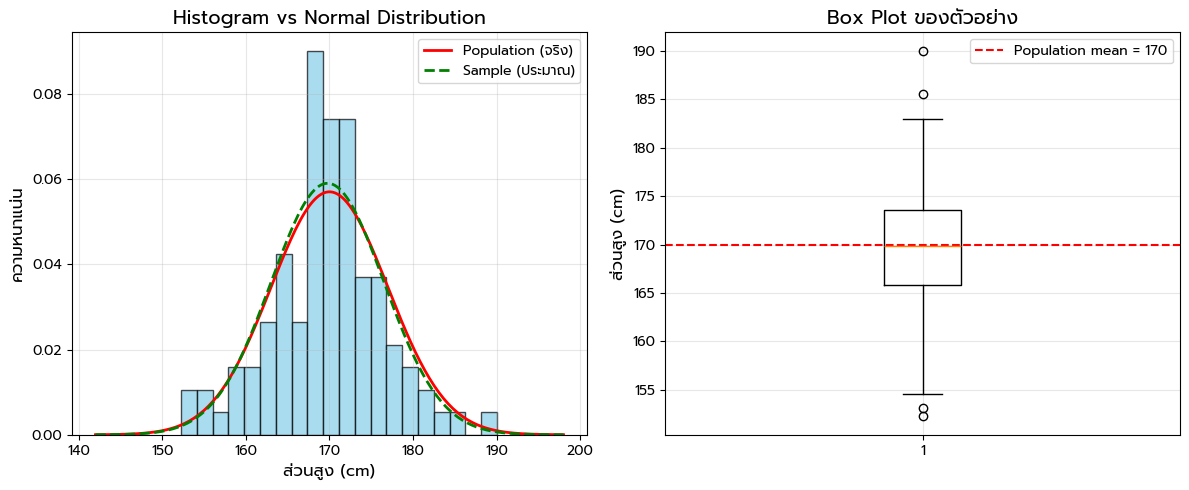

💡 สังเกต: กราฟสีเขียว (sample) ใกล้เคียงกราฟสีแดง (population)


In [7]:
# วาดกราฟ
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram ของตัวอย่าง
plt.subplot(1, 2, 1)
plt.hist(x, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# วาด theoretical normal distribution
x_range = np.linspace(mu - 4*sd, mu + 4*sd, 200)
plt.plot(x_range, norm.pdf(x_range, mu, sd), 'r-', linewidth=2, label='Population (จริง)')
plt.plot(x_range, norm.pdf(x_range, sample_mean, unbiased_std), 'g--', linewidth=2, label='Sample (ประมาณ)')

plt.xlabel('ส่วนสูง (cm)', fontsize=12)
plt.ylabel('ความหนาแน่น', fontsize=12)
plt.title('Histogram vs Normal Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(x, vert=True)
plt.axhline(mu, color='r', linestyle='--', label=f'Population mean = {mu}')
plt.ylabel('ส่วนสูง (cm)', fontsize=12)
plt.title('Box Plot ของตัวอย่าง', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 สังเกต: กราฟสีเขียว (sample) ใกล้เคียงกราฟสีแดง (population)")

## 🎯 Step 7: PPF - Percent Point Function (Inverse CDF)

**คำถาม**: ถ้าอยากอยู่ใน **top 5%** (95th percentile) ต้องสูงเท่าไหร่?

**PPF (Percent Point Function)** = Inverse CDF
- Input: Percentile (0-1)
- Output: ค่าที่ตรงกับ percentile นั้น

**สูตร**: `norm.ppf(percentile, loc=μ, scale=σ)`

In [8]:
# หาส่วนสูงที่อยู่ใน 95th percentile
percentile_95 = norm.ppf(0.95, loc=mu, scale=sd)

print("🎯 PPF - Percent Point Function")
print(f"\nคำถาม: อยากอยู่ใน top 5% (95th percentile) ต้องสูงเท่าไหร่?")
print(f"คำตอบ: {percentile_95:.2f} cm")
print(f"\n💡 ความหมาย: ถ้าคุณสูง {percentile_95:.2f} cm")
print(f"   → มีคน 95% ที่เตี้ยกว่าคุณ")
print(f"   → มีคนเพียง 5% ที่สูงกว่าคุณ")

# ลองหา percentiles อื่น ๆ
print(f"\n📊 Percentiles ต่าง ๆ:")
for p in [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]:
    height = norm.ppf(p, loc=mu, scale=sd)
    print(f"  {p*100:.0f}th percentile: {height:.2f} cm")

🎯 PPF - Percent Point Function

คำถาม: อยากอยู่ใน top 5% (95th percentile) ต้องสูงเท่าไหร่?
คำตอบ: 181.51 cm

💡 ความหมาย: ถ้าคุณสูง 181.51 cm
   → มีคน 95% ที่เตี้ยกว่าคุณ
   → มีคนเพียง 5% ที่สูงกว่าคุณ

📊 Percentiles ต่าง ๆ:
  25th percentile: 165.28 cm
  50th percentile: 170.00 cm
  75th percentile: 174.72 cm
  90th percentile: 178.97 cm
  95th percentile: 181.51 cm
  99th percentile: 186.28 cm


## 📉 Step 8: CDF - Cumulative Distribution Function

**คำถาม**: ถ้าคุณสูง **160 cm** → อยู่ percentile ไหน?

**CDF (Cumulative Distribution Function)** = ความน่าจะเป็นสะสม
- Input: ค่า x
- Output: P(X ≤ x) = ความน่าจะเป็นที่ได้ค่าน้อยกว่าหรือเท่ากับ x

**สูตร**: `norm.cdf(x, loc=μ, scale=σ)`

In [9]:
# หา percentile ของคนสูง 160 cm
height_160 = 160
percentile_160 = norm.cdf(height_160, loc=mu, scale=sd)

print("📉 CDF - Cumulative Distribution Function")
print(f"\nคำถาม: ถ้าคุณสูง {height_160} cm → อยู่ percentile ไหน?")
print(f"คำตอบ: {percentile_160:.4f} = {percentile_160*100:.2f}th percentile")
print(f"\n💡 ความหมาย:")
print(f"   → มีคน {percentile_160*100:.2f}% ที่เตี้ยกว่าคุณ")
print(f"   → มีคน {(1-percentile_160)*100:.2f}% ที่สูงกว่าคุณ")

# ลองหลายความสูง
print(f"\n📊 หา Percentile จากความสูงต่าง ๆ:")
for h in [150, 160, 170, 180, 190]:
    p = norm.cdf(h, loc=mu, scale=sd)
    print(f"  สูง {h} cm → {p*100:.2f}th percentile")

📉 CDF - Cumulative Distribution Function

คำถาม: ถ้าคุณสูง 160 cm → อยู่ percentile ไหน?
คำตอบ: 0.0766 = 7.66th percentile

💡 ความหมาย:
   → มีคน 7.66% ที่เตี้ยกว่าคุณ
   → มีคน 92.34% ที่สูงกว่าคุณ

📊 หา Percentile จากความสูงต่าง ๆ:
  สูง 150 cm → 0.21th percentile
  สูง 160 cm → 7.66th percentile
  สูง 170 cm → 50.00th percentile
  สูง 180 cm → 92.34th percentile
  สูง 190 cm → 99.79th percentile


## 🎯 Step 9: ความน่าจะเป็นที่สูงกว่า (Tail Probability)

**คำถาม**: ถ้าคุณสูง **180 cm** → มีคนสูงกว่าคุณกี่เปอร์เซ็นต์?

**วิธีคิด**:
- CDF(180) = P(X ≤ 180) = คนที่เตี้ยกว่าหรือเท่ากับ 180
- P(X > 180) = 1 - CDF(180) = คนที่สูงกว่า 180

นี่คือ **upper tail probability**

In [10]:
# หาความน่าจะเป็นที่สูงกว่า 180 cm
height_180 = 180
prob_taller = 1 - norm.cdf(height_180, loc=mu, scale=sd)

print("🎯 Upper Tail Probability")
print(f"\nคำถาม: ถ้าคุณสูง {height_180} cm → มีคนสูงกว่ากี่เปอร์เซ็นต์?")
print(f"คำตอบ: {prob_taller:.4f} = {prob_taller*100:.2f}%")
print(f"\n💡 ความหมาย:")
print(f"   → มีเพียง {prob_taller*100:.2f}% ของคนที่สูงกว่า {height_180} cm")
print(f"   → มี {(1-prob_taller)*100:.2f}% ของคนที่เตี้ยกว่าหรือเท่ากับ {height_180} cm")

# ลองหลายความสูง
print(f"\n📊 ความน่าจะเป็นที่สูงกว่าความสูงต่าง ๆ:")
for h in [165, 170, 175, 180, 185]:
    p_taller = 1 - norm.cdf(h, loc=mu, scale=sd)
    print(f"  สูงกว่า {h} cm: {p_taller*100:.2f}%")

🎯 Upper Tail Probability

คำถาม: ถ้าคุณสูง 180 cm → มีคนสูงกว่ากี่เปอร์เซ็นต์?
คำตอบ: 0.0766 = 7.66%

💡 ความหมาย:
   → มีเพียง 7.66% ของคนที่สูงกว่า 180 cm
   → มี 92.34% ของคนที่เตี้ยกว่าหรือเท่ากับ 180 cm

📊 ความน่าจะเป็นที่สูงกว่าความสูงต่าง ๆ:
  สูงกว่า 165 cm: 76.25%
  สูงกว่า 170 cm: 50.00%
  สูงกว่า 175 cm: 23.75%
  สูงกว่า 180 cm: 7.66%
  สูงกว่า 185 cm: 1.61%


## 📊 Step 10: Visualize CDF และ PPF

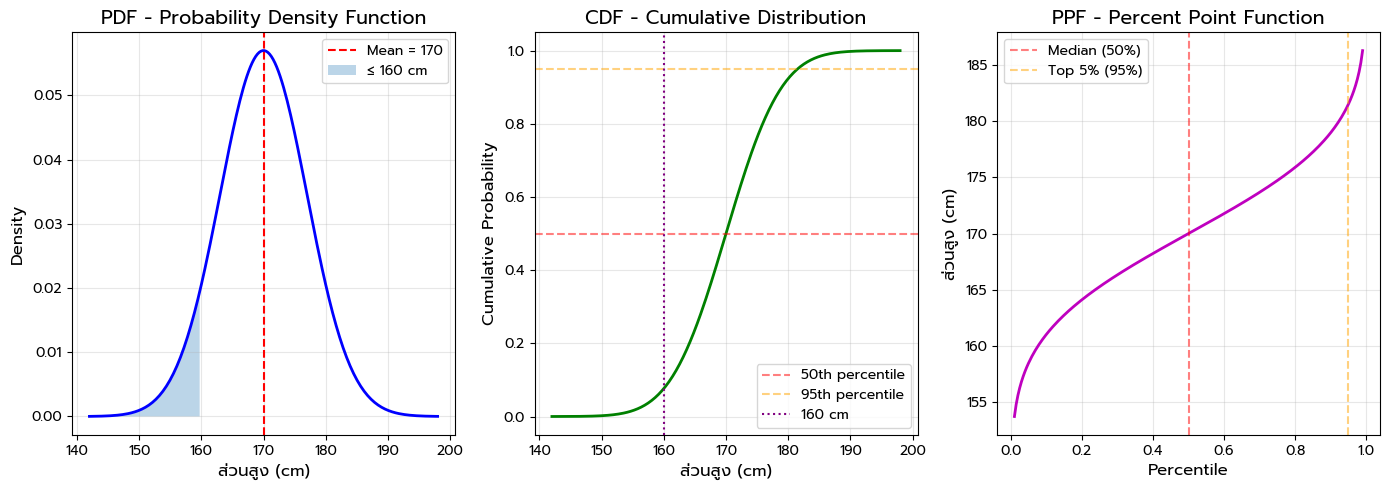

💡 สังเกต:
  - PDF: แสดงความหนาแน่น (density) ที่แต่ละความสูง
  - CDF: แสดงความน่าจะเป็นสะสม (≤ ความสูงนั้น)
  - PPF: CDF กลับด้าน (จาก percentile → ความสูง)


In [11]:
# สร้างกราฟ
plt.figure(figsize=(14, 5))

# Subplot 1: PDF (Probability Density Function)
plt.subplot(1, 3, 1)
x_range = np.linspace(mu - 4*sd, mu + 4*sd, 200)
plt.plot(x_range, norm.pdf(x_range, mu, sd), 'b-', linewidth=2)
plt.axvline(mu, color='r', linestyle='--', label=f'Mean = {mu}')
plt.fill_between(x_range[x_range <= 160], norm.pdf(x_range[x_range <= 160], mu, sd), alpha=0.3, label='≤ 160 cm')
plt.xlabel('ส่วนสูง (cm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('PDF - Probability Density Function', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: CDF (Cumulative Distribution Function)
plt.subplot(1, 3, 2)
plt.plot(x_range, norm.cdf(x_range, mu, sd), 'g-', linewidth=2)
plt.axhline(0.5, color='r', linestyle='--', alpha=0.5, label='50th percentile')
plt.axhline(0.95, color='orange', linestyle='--', alpha=0.5, label='95th percentile')
plt.axvline(160, color='purple', linestyle=':', label='160 cm')
plt.xlabel('ส่วนสูง (cm)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title('CDF - Cumulative Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Subplot 3: PPF (Inverse CDF)
plt.subplot(1, 3, 3)
percentiles = np.linspace(0.01, 0.99, 200)
heights = norm.ppf(percentiles, mu, sd)
plt.plot(percentiles, heights, 'm-', linewidth=2)
plt.axvline(0.5, color='r', linestyle='--', alpha=0.5, label='Median (50%)')
plt.axvline(0.95, color='orange', linestyle='--', alpha=0.5, label='Top 5% (95%)')
plt.xlabel('Percentile', fontsize=12)
plt.ylabel('ส่วนสูง (cm)', fontsize=12)
plt.title('PPF - Percent Point Function', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("  - PDF: แสดงความหนาแน่น (density) ที่แต่ละความสูง")
print("  - CDF: แสดงความน่าจะเป็นสะสม (≤ ความสูงนั้น)")
print("  - PPF: CDF กลับด้าน (จาก percentile → ความสูง)")

## 🎓 สรุป: สิ่งที่เราได้เรียนรู้

### 🔑 แนวคิดหลัก (Key Concepts):

#### 1. **Sampling และ Estimation**
```python
# สุ่มตัวอย่าง
x = norm.rvs(loc=mu, scale=sd, size=n)

# ประมาณพารามิเตอร์
mean = x.mean()              # Mean
var_mle = x.var()            # Variance (MLE, biased)
var_unbiased = x.var(ddof=1) # Variance (Unbiased)
```

#### 2. **MLE vs Unbiased Estimators**
| Estimator | Formula | Bias |
|-----------|---------|------|
| MLE | หารด้วย n | Biased (ต่ำกว่าจริง) |
| Unbiased | หารด้วย n-1 | Unbiased (ถูกต้อง) |

**ใช้ `ddof=1`** เสมอเมื่อคำนวณ variance/std จากตัวอย่าง!

#### 3. **CDF - Cumulative Distribution Function**
```python
# จาก ค่า → percentile
percentile = norm.cdf(x, loc=mu, scale=sd)
# ตัวอย่าง: สูง 160 cm → percentile ไหน?
```

**ใช้เมื่อ**: รู้ค่า แล้วอยากรู้ว่าอยู่ตำแหน่งไหน

#### 4. **PPF - Percent Point Function (Inverse CDF)**
```python
# จาก percentile → ค่า
value = norm.ppf(percentile, loc=mu, scale=sd)
# ตัวอย่าง: อยากอยู่ top 5% → ต้องสูงเท่าไหร่?
```

**ใช้เมื่อ**: รู้ตำแหน่งที่ต้องการ แล้วอยากรู้ว่าต้องมีค่าเท่าไหร่

#### 5. **Tail Probability**
```python
# ความน่าจะเป็นที่มากกว่า x
prob = 1 - norm.cdf(x, loc=mu, scale=sd)
# ตัวอย่าง: สูง 180 cm → มีคนสูงกว่ากี่%?
```

### 📊 ความสัมพันธ์:
```
PPF = Inverse(CDF)
CDF(PPF(p)) = p
PPF(CDF(x)) = x
```

### 🌍 ประยุกต์ใช้:

1. **Quality Control**: 
   - กำหนดขอบเขต (specification limits)
   - คำนวณเปอร์เซ็นต์ของผลิตภัณฑ์ที่ผ่าน/ไม่ผ่านมาตรฐาน

2. **Finance**:
   - Value at Risk (VaR)
   - ความเสี่ยงที่ขาดทุนมากกว่า x%

3. **Medical/Health**:
   - Z-score สำหรับการเติบโตของเด็ก
   - ช่วง reference ranges ของผลตรวจ

4. **A/B Testing**:
   - Confidence intervals
   - P-values
   - Hypothesis testing

5. **Bayesian ML**:
   - Prior/Posterior distributions
   - Credible intervals
   - Probability calculations

---

## 🎉 ยินดีด้วย!

คุณเข้าใจ **CDF, PDF, และ Percentiles** แล้ว!  
นี่คือพื้นฐานสำคัญมากสำหรับ **Bayesian Machine Learning**! 💪

**Next Steps**:
- ลองใช้กับ distributions อื่น (t-distribution, chi-square, etc.)
- ศึกษา Confidence Intervals
- เรียนรู้ Hypothesis Testing
- ประยุกต์ใช้กับ Bayesian Inference

---